In [10]:
library(ggplot2)
library(ggsci)
library(readxl)
library(yaml)
library(tidyverse)

theme_set(theme_bw(base_size=16))
options(repr.plot.width=15, repr.plot.height=15)

yaml <- read_yaml("/home/weber/PycharmProjects/EXOTIC/clean/src/config_clean_clean.yaml")

New names:
* `` -> ...1



...1,group,Cat,ratio,OR,SE,IC_low,IC_up,pvalue,Const OK,Alt OK,Const_NOT OK,Alt_NOT OK,id
<dbl>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Cons.,Unconserved,NA,0.3502919,0.043888297,0.3214191,0.3817584,4.604263e-128,1742,1797,4735,1711,1
1,Cons.,Conserved,NA,2.8547620,0.043888297,2.6194579,3.1112032,4.604263e-128,4735,1711,1742,1797,2
2,Pop variant (MC),synonymous,NA,1.0884665,0.002870704,1.0823594,1.0946081,1.520289e-192,629625,242601,1337326,560871,1
3,Pop variant (MC),missense,NA,0.9472303,0.002811703,0.9420245,0.9524648,4.840154e-83,1297022,539512,669929,263960,2
4,Pop variant (MC),stop gained,NA,0.8642144,0.009566111,0.8481617,0.8805709,1.155900e-51,34791,16399,1932160,787073,3
5,Pop variant (MC),stop lost,NA,0.5440289,0.036004715,0.5069605,0.5838077,1.626188e-61,1802,1352,1965149,802120,4
6,Pop variant (MC),start lost,NA,0.3970240,0.025250637,0.3778531,0.4171676,2.826548e-284,3105,3187,1963846,800285,5
7,Pop variant (MC),stop retained,NA,0.5878600,0.063460348,0.5191052,0.6657213,2.420526e-16,606,421,1966345,803051,6
8,Pop variant (MAF),1e-06 - 1e-05,NA,1.0454755,0.002777977,1.0397986,1.0511835,1.423029e-57,1294640,520748,672311,282724,1


Warning message:
“Ignoring unknown aesthetics: x”
Warning message:
“Removed 1 rows containing missing values (geom_errorbarh).”
Warning message:
“Removed 1 rows containing missing values (geom_errorbarh).”
Warning message:
“Removed 1 rows containing missing values (geom_errorbarh).”
Warning message:
“Removed 1 rows containing missing values (geom_errorbarh).”
Warning message:
“Removed 1 rows containing missing values (geom_errorbarh).”


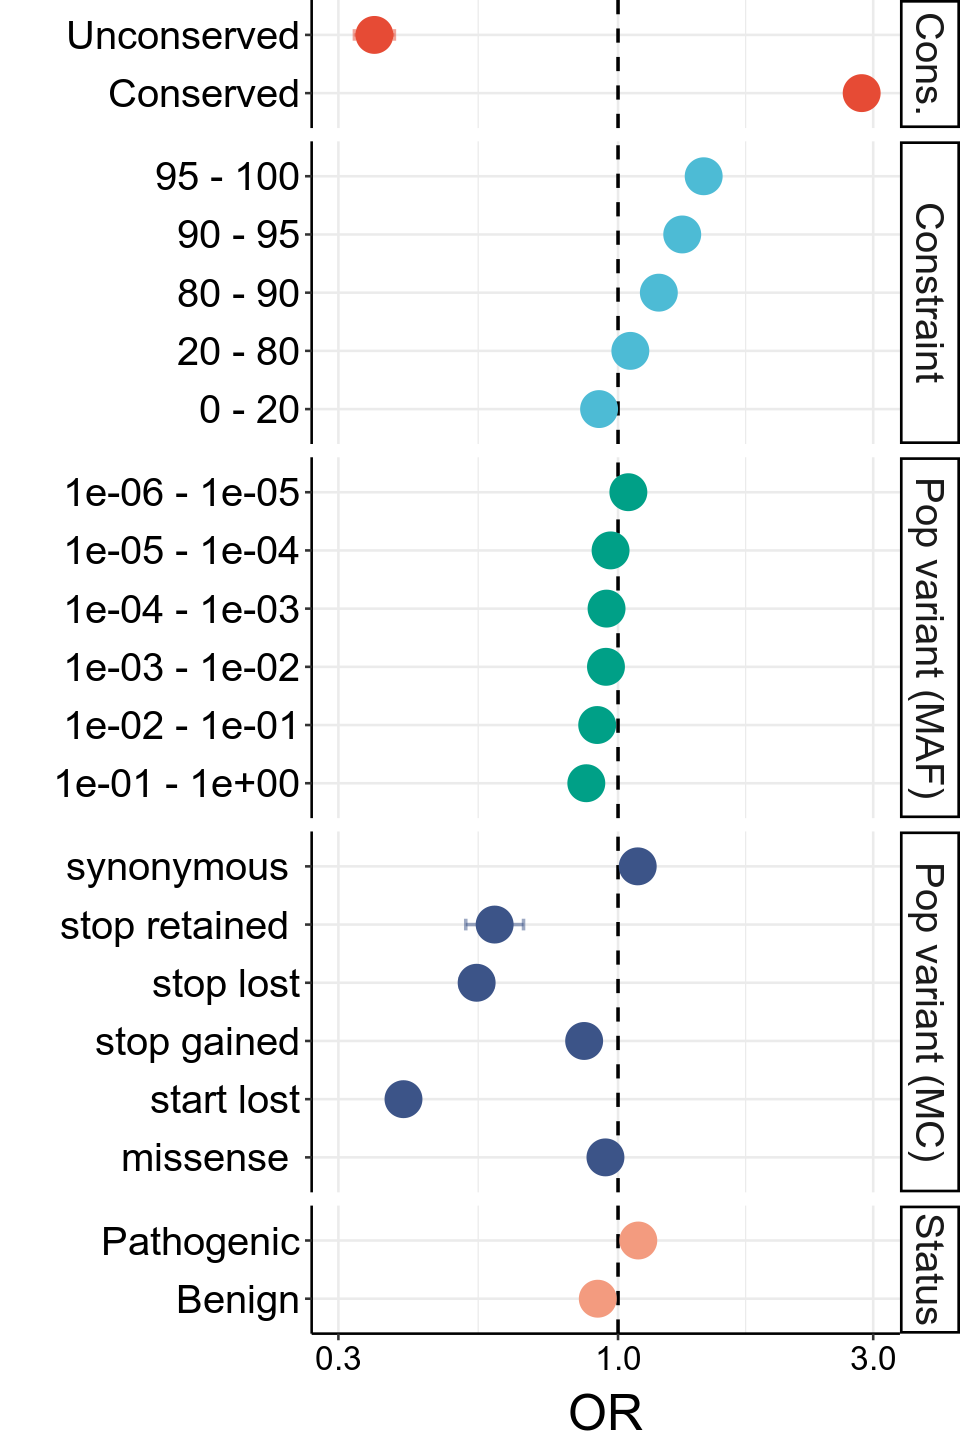

In [9]:
w = 8
h = 12

options(repr.plot.width=w, repr.plot.height=h)

# colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))

output_path <- yaml$"3_EXONS_PROPERTIES"$"Figures_data"$"odds_ratio_const_alt"

data <- read_excel(output_path)
data$group <- gsub('Conservation', 'Cons.', data$group)
# data$group <- gsub('Constraint', 'Conservation / Constraint', data$group)
data$group <- gsub('MAF', 'Pop variant (MAF)', data$group)
data$group <- gsub('Consequence', 'Pop variant (MC)', data$group)
data$Cat <- gsub('variant', '', data$Cat)

data

# Make the plot
p <- ggplot(data, aes(x=Cat, y=OR, color=group)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
    geom_vline(xintercept = 1, linetype="dashed", color = "black", size=1) + 

    geom_errorbarh( aes(y=Cat, x=OR, xmin=IC_low, xmax=IC_up, color = group), alpha=0.5, size=1, height=0.2) + 
    geom_point(aes(y=Cat, x=OR, fill=Cat, color = group), stat="identity",  size=10,  alpha=1)   + 
    facet_grid(group ~ ., scales="free_y", space='free_y', ) + 
    xlab("OR") + ylab("") +

    scale_x_log10(limits = c(0.3,3)) +
    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
        legend.position = "none", 
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=30)) +
   scale_color_npg()

for (format in c('png', 'jpg')){
    for (dpi in c(150, 300)){          
        output_path_update = paste(gsub('.xlsx', '', output_path), sprintf("_%s.%s", dpi, format), sep='')
        ggsave(output_path_update, dpi=dpi, width = w, height = h)
    }
}

p


New names:
* `` -> ...1



...1,group,Cat,ratio,OR,SE,IC_low,IC_up,id
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Conserv.,Unconserved,0 - 0.2,5.6463296,0.124058026,4.4275748,7.2005646,1
1,Conserv.,Conserved,0 - 0.2,0.1771062,0.124058026,0.1388780,0.2258573,2
2,Conserv.,Unconserved,0.2 - 0.4,3.2053274,0.077338883,2.7544837,3.7299635,1
3,Conserv.,Conserved,0.2 - 0.4,0.3119806,0.077338883,0.2680991,0.3630444,2
4,Conserv.,Unconserved,0.4 - 0.6,1.8658269,0.059558482,1.6602525,2.0968558,1
5,Conserv.,Conserved,0.4 - 0.6,0.5359554,0.059558482,0.4769045,0.6023180,2
6,Conserv.,Unconserved,0.6 - 0.8,1.2041719,0.071998961,1.0456871,1.3866768,1
7,Conserv.,Conserved,0.6 - 0.8,0.8304462,0.071998961,0.7211486,0.9563091,2
8,Conserv.,Unconserved,0.8 - 0.99,1.2607726,0.155689594,0.9292040,1.7106549,1


Warning message:
“Ignoring unknown aesthetics: x”


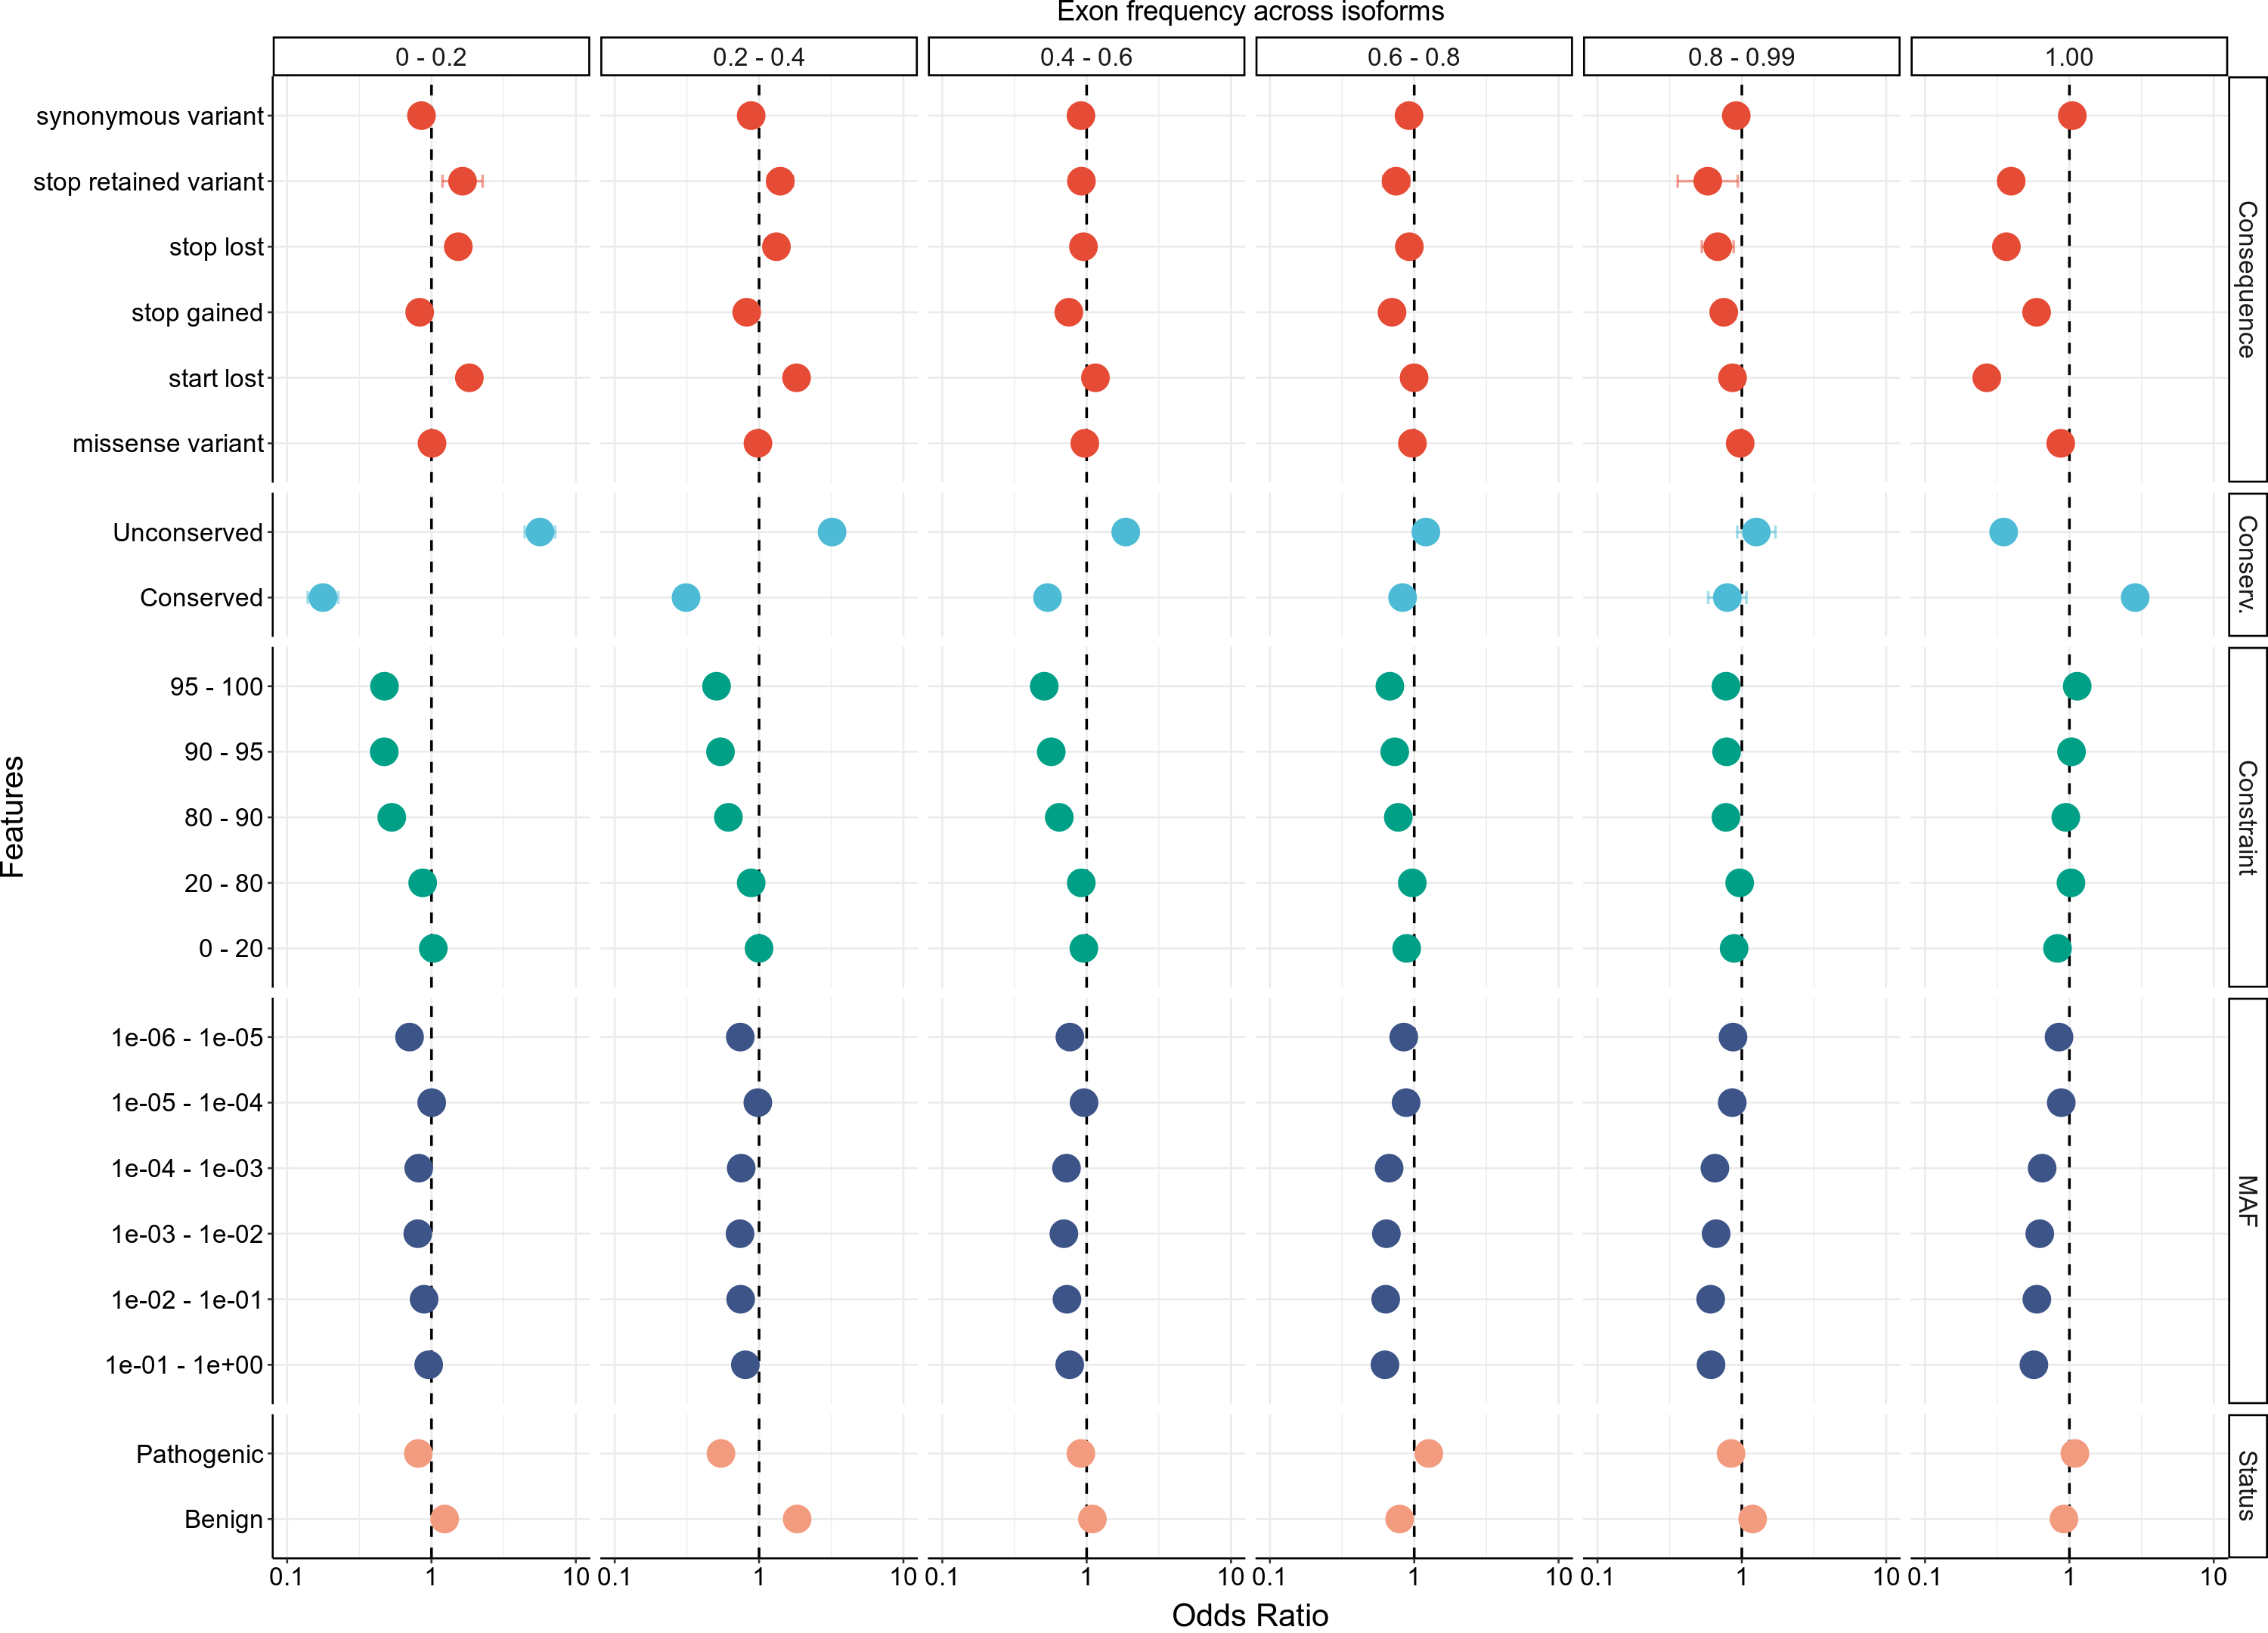

In [8]:
w = 25
h = 18

options(repr.plot.width=w, repr.plot.height=h)

colfunc <- colorRampPalette(c("#00A087FF", "#3C5488FF"))

output_path <- yaml$"3_EXONS_PROPERTIES"$"Figures_data"$"odds_ratio_const_alt_gradient"

data <- read_excel(output_path)
data$group <- gsub('Conservation', 'Conserv.', data$group)
data


# Make the plot
p <- ggplot(data, aes(x=Cat, y=OR, color=group)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
    geom_vline(xintercept = 1, linetype="dashed", color = "black", size=1) + 

    geom_errorbarh( aes(y=Cat, x=OR, xmin=IC_low, xmax=IC_up, color = group), alpha=0.5, size=1, height=0.2) + 
    geom_point(aes(y=Cat, x=OR, fill=Cat, color = group), stat="identity",  size=10,  alpha=1)   + 
    facet_grid(group ~ ratio, scales="free", space='free') + 
   labs(title="Exon frequency across isoforms", y="Features", x="Odds Ratio") + 

    scale_x_log10(limits = c(0.1,10), labels = function(x) ifelse(x == 0, "0", x)) +
    theme(
        plot.title=element_text(hjust=0.5, size=22),
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
        legend.position = "none", 
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=20),
        axis.text.y = element_text(color='black'),
        text = element_text(size=25),
        strip.text.y = element_text(size = 20)
    ) +
   scale_color_npg()

for (format in c('png', 'jpg')){
    for (dpi in c(150, 300)){          
        output_path_update = paste(gsub('.xlsx', '', output_path), sprintf("_%s.%s", dpi, format), sep='')
        ggsave(output_path_update, dpi=dpi, width = w, height = h)
    }
}
p
